# Customer Satisfaction Prediction for On-Demand Delivery Startup

**Problem Statement:**

In the dynamic landscape of the logistics and delivery sector, our rapidly expanding startup faces multifaceted challenges exacerbated by the COVID-19 pandemic. To ensure continued growth and uphold our commitment to customer satisfaction, it is imperative that we accurately assess and predict the factors influencing customer happiness.

The objective of this project is to develop a robust predictive model that can anticipate customer satisfaction levels based on key attributes and feedback data. Knowing which customers are unhappy and what factors lead to such an outcome could help the company retain its customers. Features that influence customer happiness can be used to inform strategic decisions, which could leave to increased customer loyalty, improved services, and customer satisfaction

This project seeks to leverage data analytics and machine learning techniques to decipher the intricate relationship between customer satisfaction, operational challenges, and pandemic-induced disruptions. By achieving a high level of predictive accuracy, we aspire to empower our startup to not only survive the ongoing uncertainties but also thrive as a leading player in the global logistics and delivery domain.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')



# Data

The data provided is from a survey conduct among the startups current customers. a subset was provided for this project while the remainder will be used as a separate test set.

# Loading Data

In [ ]:
path = '/content/drive/MyDrive/ACME-HappinessSurvey2020.csv'
df = pd.read_csv(path)


# Exploring The Data

In [ ]:
df.head()


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
'The data has {} rows and {} columns'.format(df.shape[0], df.shape[1])


'The data has 126 rows and 7 columns'

# Data Wrangling

Columns in the data were renamed to assign responses each customer made while the survey was conducted.

In [ ]:
columns = {'X1': 'delivery_time', 'X2': 'order_accuracy', 'X3': 'order_sat', 'X4': 'price_sat', 'X5': 'courier_sat', 'X6': 'app_utility'}


In [ ]:
df.rename(columns=columns, inplace=True)


In [ ]:
df.head()


,Y,delivery_time,order_accuracy,order_sat,price_sat,courier_sat,app_utility
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
df.isnull().sum()



Y                 0
delivery_time     0
order_accuracy    0
order_sat         0
price_sat         0
courier_sat       0
app_utility       0
dtype: int64

# More Exploratory Data Analysis

In [ ]:
df.describe()

,Y,delivery_time,order_accuracy,order_sat,price_sat,courier_sat,app_utility
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Y               126 non-null    int64
 1   delivery_time   126 non-null    int64
 2   order_accuracy  126 non-null    int64
 3   order_sat       126 non-null    int64
 4   price_sat       126 non-null    int64
 5   courier_sat     126 non-null    int64
 6   app_utility     126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


The plots below show how customers scored on the six questions asked in the survey. a lot of happy customers tended to rate delivery time highly. The same could not be observed in the unhappy customers, whose ratings were some mixed.  

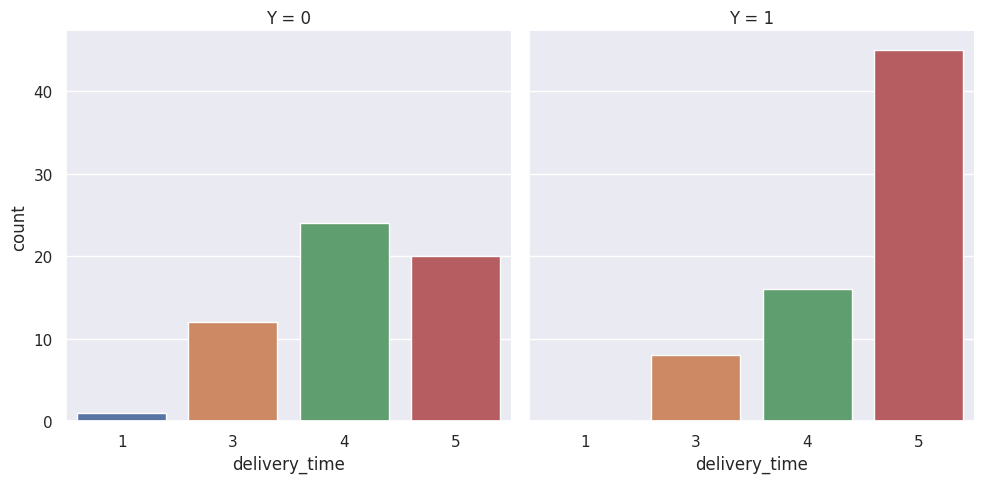

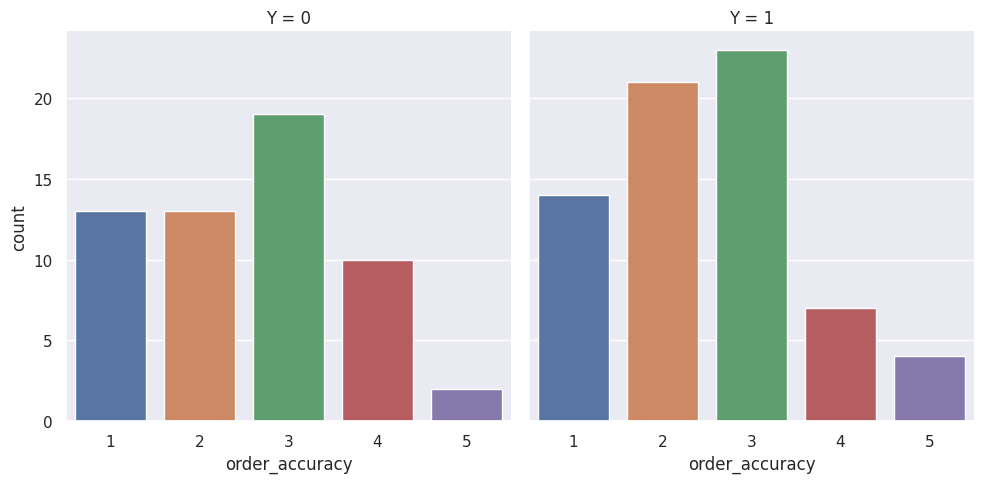

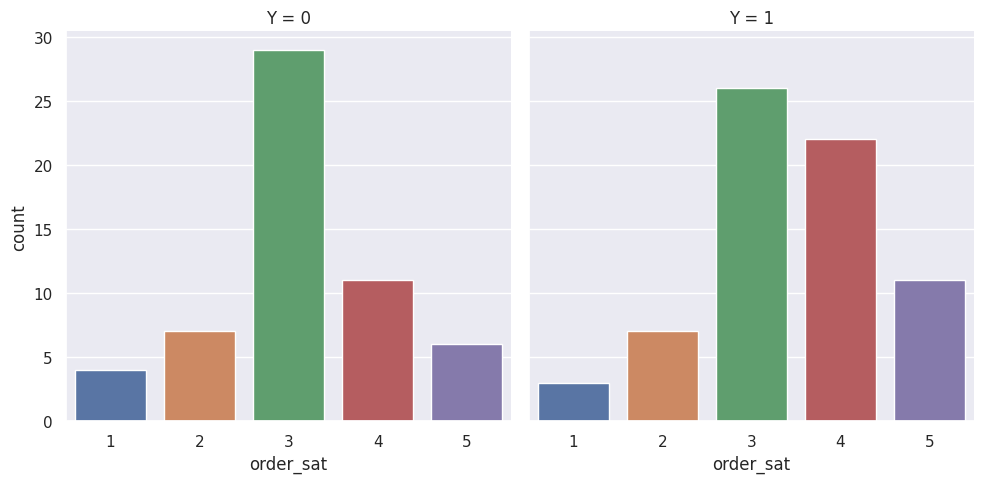

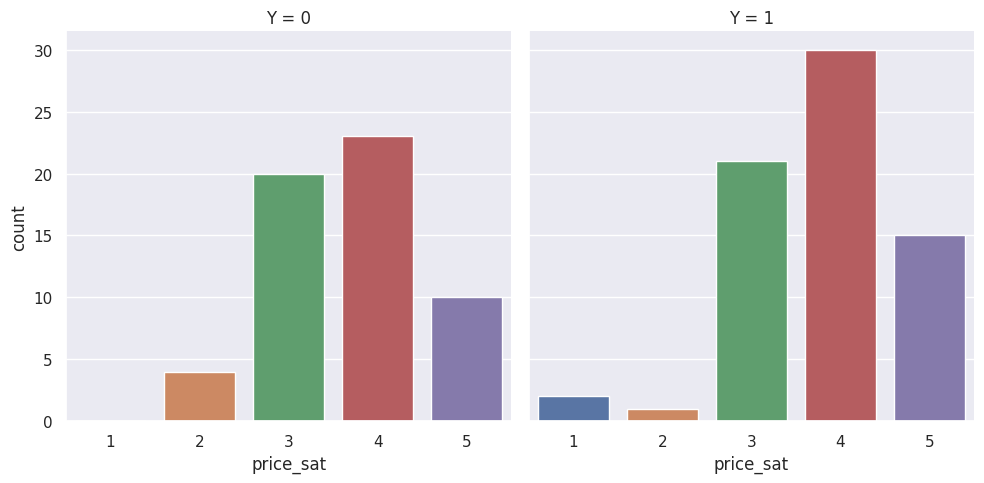

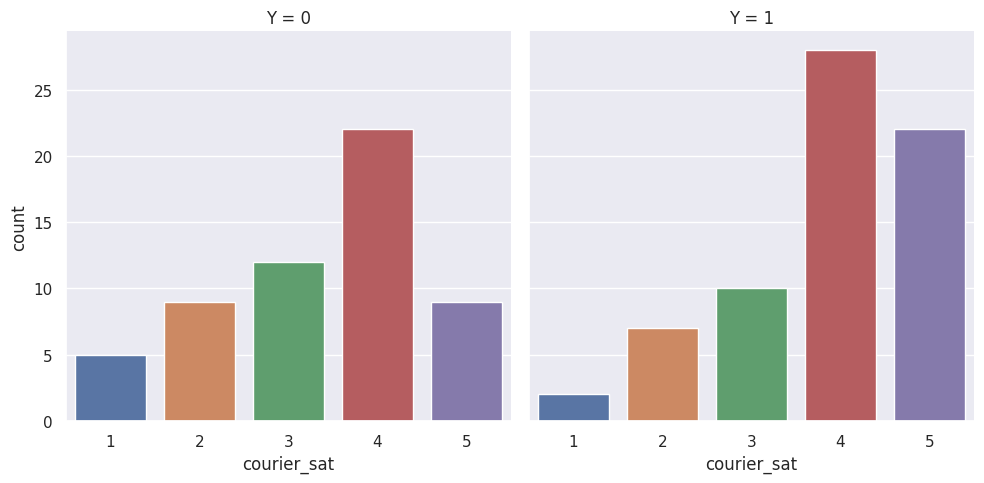

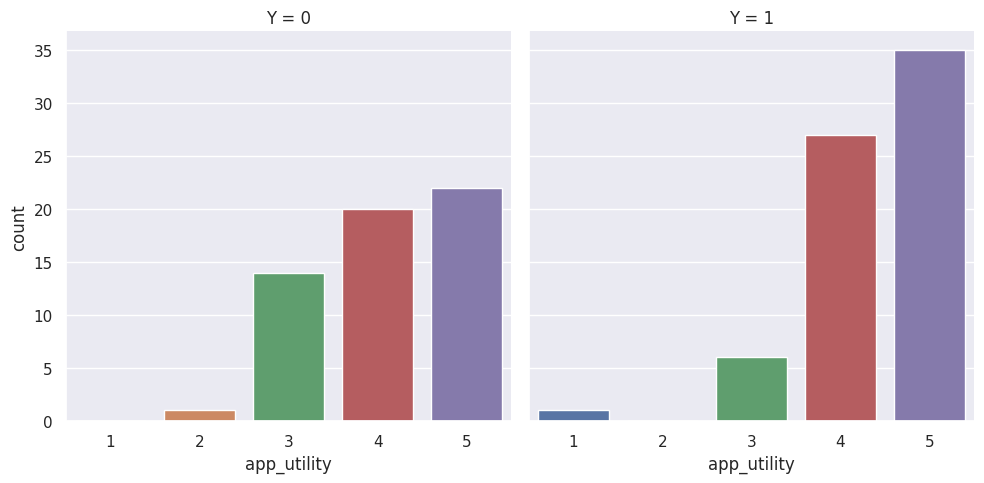

In [ ]:
sns.set_theme(style="darkgrid")
for i in df.columns[1:]:
  sns.catplot(x=i, col='Y', data=df, kind='count')
  plt.show()





<Axes: >

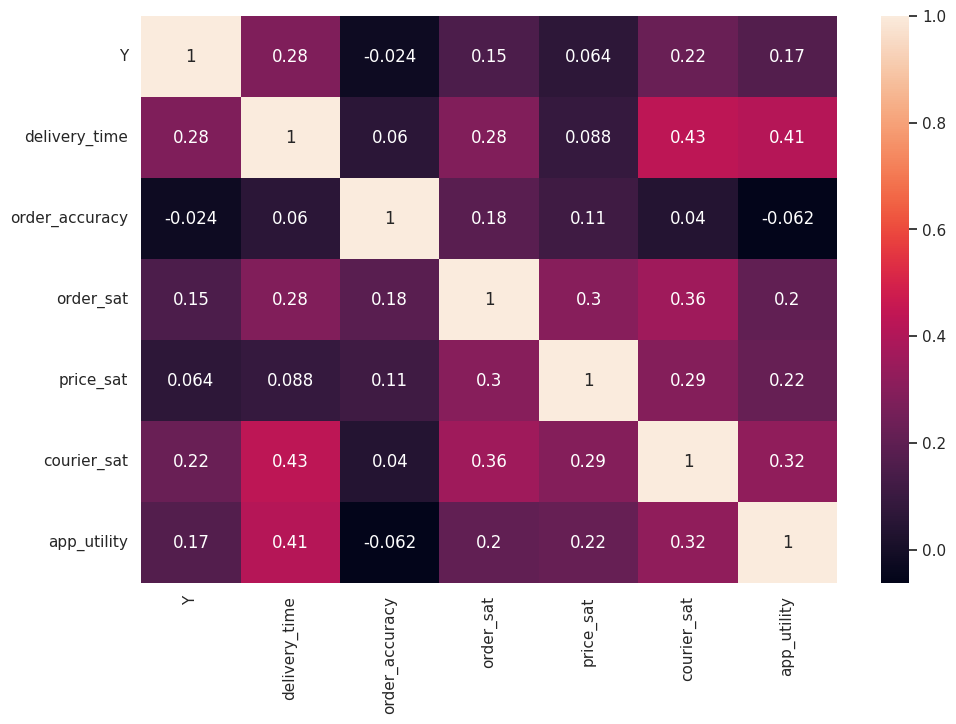

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)



#Modeling and Preprocessing

The appears to be slightly more happy customers than unhappy ones. This is great news. Perhaps after this project we could find more ways to improve customer satisfaction up to a point where there are many more happ customers.

<Axes: xlabel='Y', ylabel='count'>

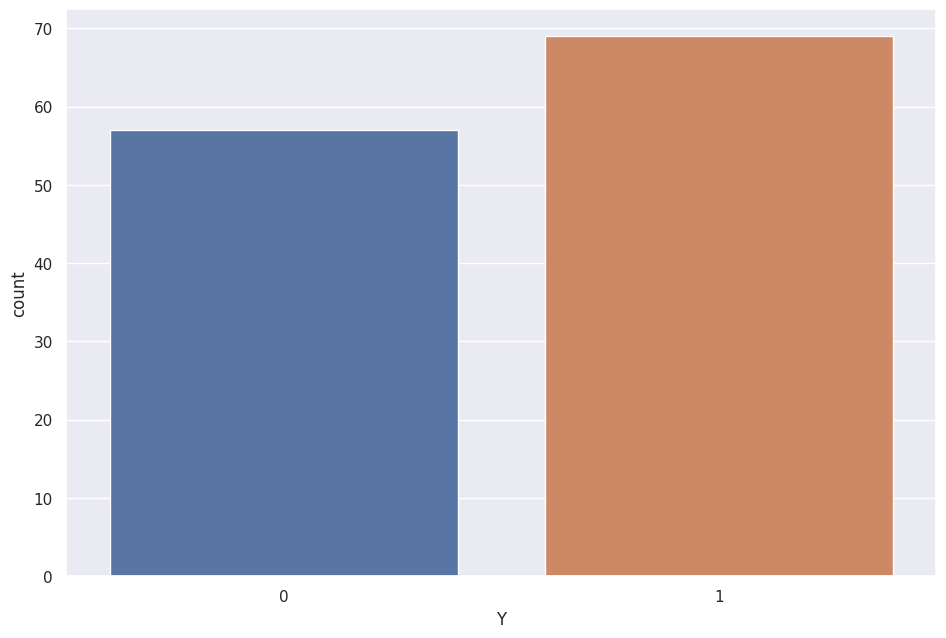

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Y', data=df)




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline


In [ ]:
features = [i for i in df.columns if i != 'Y']
X = df[features]
y = df['Y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=4)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 6), (26, 6), (100,), (26,))

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('lr', lr)])
lr_pipeline.fit(X_train, y_train)
lr_pipeline.score(X_test, y_test)

0.6153846153846154

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(lr_pipeline, X, y, score_func=accuracy_score):
  kf = KFold(n_splits=5, shuffle=True, random_state=4)
  scores = []
  for train_idx, test_idx in kf.split(X):
    lr_pipeline.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = score_func(y.iloc[test_idx], lr_pipeline.predict(X.iloc[test_idx]))
    scores.append(score)
  return np.mean(scores)

In [ ]:
lr = LogisticRegression()
cv_score(lr_pipeline, X, y)

0.5310769230769231

In [ ]:
# grid parameters to search over for best C
Cs = [0.001, 0.01, 0.1, 1, 10]

for C in Cs:
  lr = LogisticRegression(C=C)
  cv_score(lr_pipeline, X, y)
  score_info = [C, cv_score(lr_pipeline, X, y)]
  print(score_info)

[0.001, 0.5310769230769231]
[0.01, 0.5310769230769231]
[0.1, 0.5310769230769231]
[1, 0.5310769230769231]
[10, 0.5310769230769231]


In [ ]:
from sklearn.model_selection import GridSearchCV

g = GridSearchCV(lr_pipeline, param_grid={'lr__C': Cs}, cv=5)
g.fit(X_train, y_train)
print('Tuned Logistic Regression Parameters: {}'.format(g.best_params_))
print('Best score is {}'.format(g.best_score_))





Tuned Logistic Regression Parameters: {'lr__C': 0.1}
Best score is 0.5700000000000001


#Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=45)
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('rf', rf)])
rf_pipeline.fit(X_train, y_train)
rf_pipeline.score(X_test, y_test)


0.5

In [ ]:
param_grid = {'n_estimators': np.arange(100, 500, step=100),
              'max_depth': np.arange(1, 10, step=1)}


In [ ]:
rf_g = GridSearchCV(estimator = RandomForestClassifier(), param_grid=param_grid, cv=5,
                    verbose = 1,
                    refit=True,
                    n_jobs=1,
                    scoring='accuracy')
rf_g.fit(X_train, y_train)

print('Tuned Random Forest Parameters: {}'.format(rf_g.best_params_))
print('Best score is {}'.format(rf_g.best_score_))



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuned Random Forest Parameters: {'max_depth': 7, 'n_estimators': 200}
Best score is 0.6299999999999999


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

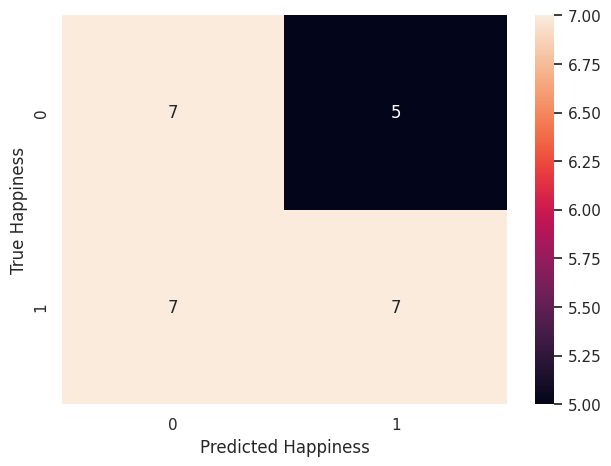

In [ ]:
rf_matrix = confusion_matrix(y_test, rf_g.predict(X_test))
sns.heatmap(rf_matrix, annot=True)
plt.xlabel('Predicted Happiness')
plt.ylabel('True Happiness')
plt.show()


In [ ]:
rf_imp = rf_g.best_estimator_.feature_importances_
rf_imp_df = pd.DataFrame(rf_imp, index=X_train.columns, columns=['importance'])
rf_imp_df.sort_values('importance', ascending=False)



,importance
order_sat,0.193671
courier_sat,0.178732
order_accuracy,0.170986
price_sat,0.166854
app_utility,0.146537
delivery_time,0.143220


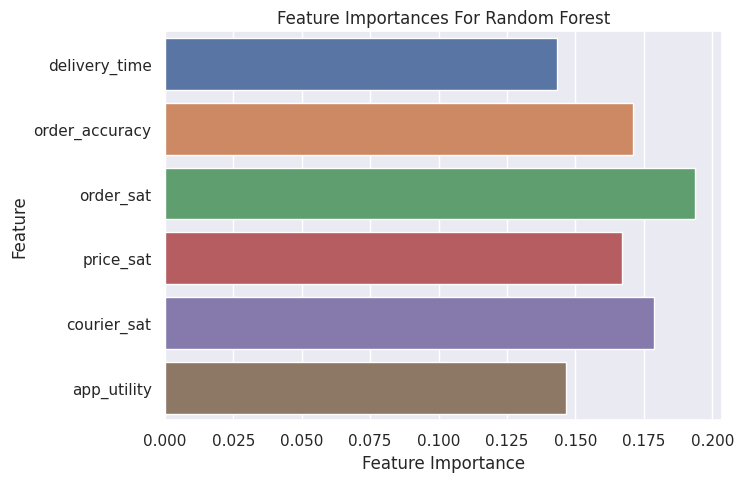

In [ ]:
sns.barplot(x=rf_imp, y=X_train.columns, data=rf_imp_df)
plt.title(label='Feature Importances For Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature' )
plt.show()



#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

In [ ]:
rates = np.arange(0.1, 2.1, 0.1)
for rate in rates:
  gb =  GradientBoostingClassifier(learning_rate=rate, max_depth=2, n_estimators=15, random_state=9)
  gb.fit(X_train, y_train)
  print('Learning rate: ', rate)
  print('Accuracy score (training): {0:.3f}'.format(gb.score(X_train, y_train)))
  print('Accuracy score (validation): {0:.3f}'.format(gb.score(X_test, y_test)))
  print()

Learning rate:  0.1
Accuracy score (training): 0.730
Accuracy score (validation): 0.615

Learning rate:  0.2
Accuracy score (training): 0.760
Accuracy score (validation): 0.692

Learning rate:  0.30000000000000004
Accuracy score (training): 0.800
Accuracy score (validation): 0.692

Learning rate:  0.4
Accuracy score (training): 0.800
Accuracy score (validation): 0.692

Learning rate:  0.5
Accuracy score (training): 0.810
Accuracy score (validation): 0.692

Learning rate:  0.6
Accuracy score (training): 0.820
Accuracy score (validation): 0.769

Learning rate:  0.7000000000000001
Accuracy score (training): 0.830
Accuracy score (validation): 0.731

Learning rate:  0.8
Accuracy score (training): 0.800
Accuracy score (validation): 0.538

Learning rate:  0.9
Accuracy score (training): 0.880
Accuracy score (validation): 0.500

Learning rate:  1.0
Accuracy score (training): 0.850
Accuracy score (validation): 0.538

Learning rate:  1.1
Accuracy score (training): 0.870
Accuracy score (validation

In [ ]:
gb = GradientBoostingClassifier(learning_rate=0.6)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.5384615384615384

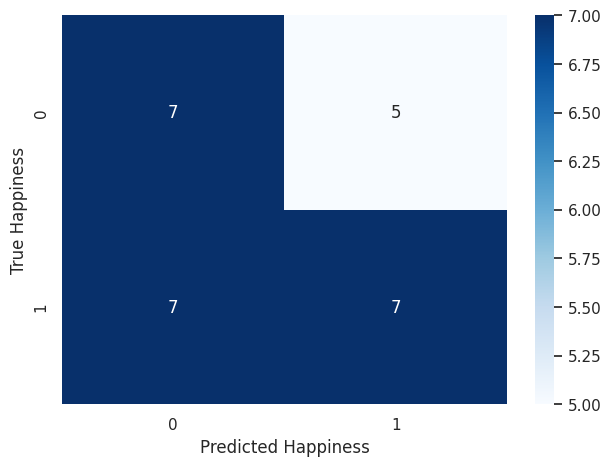

In [ ]:
sns.heatmap(confusion_matrix(y_test, gb.predict(X_test)), annot=True, cmap='Blues')
plt.xlabel('Predicted Happiness')
plt.ylabel('True Happiness')
plt.show()

In [ ]:
class_report = classification_report(y_test, gb.predict(X_test))
print(class_report)


              precision    recall  f1-score   support

           0       0.40      0.33      0.36        12
           1       0.50      0.57      0.53        14

    accuracy                           0.46        26
   macro avg       0.45      0.45      0.45        26
weighted avg       0.45      0.46      0.46        26



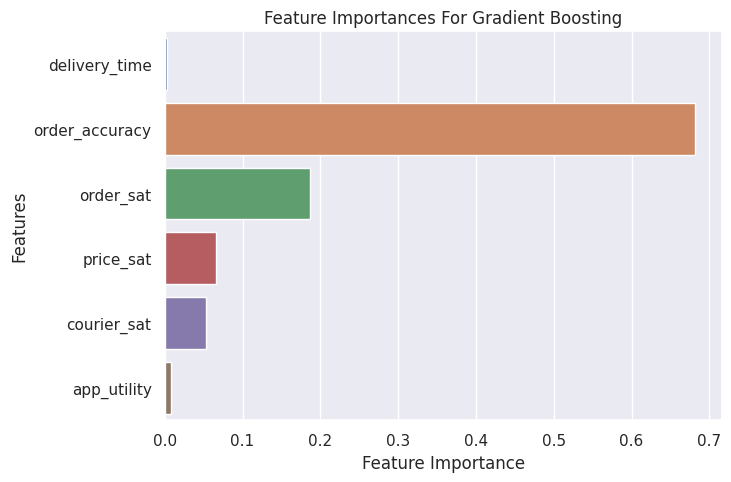

In [ ]:
sns.barplot(x=gb.feature_importances_, y=X_train.columns)
plt.title(label='Feature Importances For Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

#Conclusion
All models were not good enough to achieve required 73 percent accuracy. This maybe because more data is needed to for the models to learn from customer responses. Although the models were not effective in predicting customers happiness, we know that order accuracy, order satisfaction, and price satisfaction rank as the most important factors to customer well being.